# Exercice 2

On va faire nos premiers pas avec une analyse simples des données.

On commence par la lecture des données.  


In [2]:
import pandas as pnd

ventes = pnd.read_csv('../files/VentesPropre.csv', delimiter=';',header=[0],index_col=[0])

ventes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, FA-2008-0010 to FA-2008-0005
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE FACTURE  47 non-null     object 
 1   CODE CLIENT   47 non-null     object 
 2   SECTEUR       47 non-null     object 
 3   VENDEUR       47 non-null     object 
 4   MONTANT       47 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


In [3]:
ventes.head(10)

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0010,2008-03-12,CLI009,AUTOMATISME,BOUVET,752.98
FA-2008-0006,2008-02-04,CLI038,AUTOMATISME,ENGUENT,374.84
FA-2008-0009,2008-03-03,CLI098,ELECTRICITE,BOUVET,935.47
FA-2008-0012,2008-03-31,CLI114,ELECTRICITE,DEVEAUX,752.98
FA-2008-0008,2008-02-22,CLI115,AUTOMATISME,BOUVET,677.36
FA-2008-0027,2008-07-09,CLI145,ELECTRICITE,BOUVET,425.81
FA-2008-0028,2008-07-09,CLI145,AUTOMATISME,ENGUENT,1607.89
FA-2008-0029,2008-07-09,CLI163,AUTOMATISME,BOUVET,1436.91
FA-2008-0017,2008-05-16,CLI204,AUTOMATISME,ENGUENT,2250.72


In [4]:
ventes.tail(10)

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0019,2008-06-12,CLI300,ELECTRICITE,BOUVET,1039.05
FA-2008-0033,2008-08-14,CLI300,AUTOMATISME,DEVEAUX,535.90
FA-2008-0042,2008-09-15,CLI300,AUTOMATISME,ENGUENT,3667.68
FA-2008-0014,2008-04-18,CLI312,AUTOMATISME,ENGUENT,917.38
FA-2008-0011,2008-03-21,CLI334,ELECTRICITE,BOUVET,348.55
FA-2008-0016,2008-05-07,CLI403,ELECTRICITE,BOUVET,1147.55
FA-2008-0030,2008-07-18,CLI403,ELECTRICITE,DEVEAUX,436.86
FA-2008-0039,2008-09-09,CLI403,AUTOMATISME,BOUVET,3521.80
FA-2008-0007,2008-02-13,CLI512,AUTOMATISME,ENGUENT,935.47


On s'assure que les donnée sont bien formatées. 
Dans notre cas, on doit convertir les dates. 

In [5]:
ventes['DATE FACTURE'] = pnd.to_datetime(ventes['DATE FACTURE'], dayfirst=True)
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, FA-2008-0010 to FA-2008-0005
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE FACTURE  47 non-null     datetime64[ns]
 1   CODE CLIENT   47 non-null     object        
 2   SECTEUR       47 non-null     object        
 3   VENDEUR       47 non-null     object        
 4   MONTANT       47 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.2+ KB


On va alors utiliser query pour récupérer des données et en faire quelques analyses. 

In [6]:
ventes.query("MONTANT > 2000 and `DATE FACTURE` >= '2008-09-01' ")

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0035,2008-09-01,CLI206,AUTOMATISME,DEVEAUX,3471.13
FA-2008-0041,2008-09-13,CLI222,AUTOMATISME,DEVEAUX,4374.79
FA-2008-0042,2008-09-15,CLI300,AUTOMATISME,ENGUENT,3667.68
FA-2008-0039,2008-09-09,CLI403,AUTOMATISME,BOUVET,3521.80


In [7]:
ventes.query("VENDEUR == 'DEVEAUX' ")

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0012,2008-03-31,CLI114,ELECTRICITE,DEVEAUX,752.98
FA-2008-0020,2008-06-21,CLI206,AUTOMATISME,DEVEAUX,3659.69
FA-2008-0035,2008-09-01,CLI206,AUTOMATISME,DEVEAUX,3471.13
FA-2008-0045,2008-09-23,CLI206,AUTOMATISME,DEVEAUX,750.88
FA-2008-0024,2008-06-30,CLI209,AUTOMATISME,DEVEAUX,9367.87
FA-2008-0041,2008-09-13,CLI222,AUTOMATISME,DEVEAUX,4374.79
FA-2008-0004,2008-01-17,CLI235,AUTOMATISME,DEVEAUX,606.66
FA-2008-0033,2008-08-14,CLI300,AUTOMATISME,DEVEAUX,535.90
FA-2008-0030,2008-07-18,CLI403,ELECTRICITE,DEVEAUX,436.86


In [8]:
ventes.query("`VENDEUR` == 'DEVEAUX' ").mean(numeric_only=True)

MONTANT    2661.862222
dtype: float64

In [9]:
ventes.groupby(by='VENDEUR').mean()


,MONTANT
VENDEUR,
BOUVET,840.522273
DEVEAUX,2661.862222
ENGUENT,2344.361875


In [10]:
ventes.groupby(by='VENDEUR').size()

VENDEUR
BOUVET     22
DEVEAUX     9
ENGUENT    16
dtype: int64

In [11]:
ventes.groupby(by='SECTEUR').sum()

,MONTANT
SECTEUR,
AUTOMATISME,69800.65
ELECTRICITE,10157.39


Visualisation des données

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Nb de ventes par vendeur'}, xlabel='Vendeurs', ylabel='Ventes'>

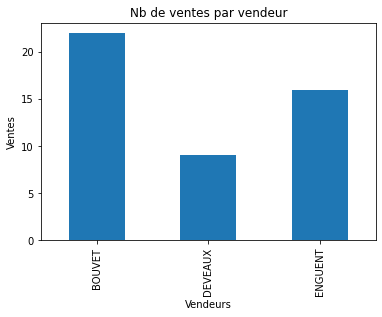

In [13]:
ventes.groupby(by='VENDEUR').size().plot(kind='bar',
                                         title='Nb de ventes par vendeur',
                                         ylabel='Ventes', xlabel='Vendeurs' )

<AxesSubplot:title={'center':'Nb de ventes par secteur'}, ylabel='Secteur'>

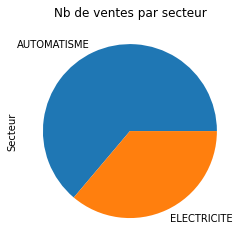

In [14]:
ventes.groupby(by='SECTEUR').size().plot(kind='pie',
                                         title='Nb de ventes par secteur',
                                         ylabel='Secteur' )

<AxesSubplot:title={'center':'MONTANT'}, xlabel='VENDEUR'>

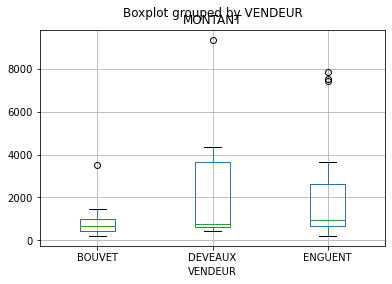

In [15]:
ventes.boxplot(column='MONTANT',by='VENDEUR')


In [16]:
moyennes = ventes.groupby(by='VENDEUR').mean()
print(moyennes)

             MONTANT
VENDEUR             
BOUVET    840.522273
DEVEAUX  2661.862222
ENGUENT  2344.361875


<BarContainer object of 3 artists>

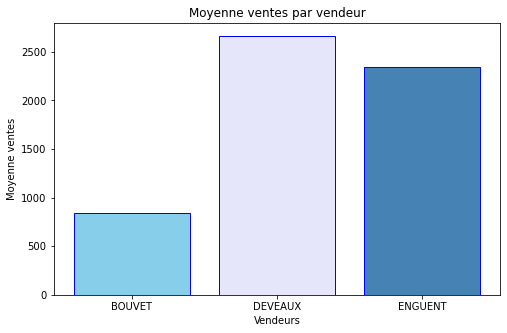

In [17]:
plt.figure(figsize=(8,5))
plt.title('Moyenne ventes par vendeur')
plt.xlabel('Vendeurs')
plt.ylabel('Moyenne ventes')
plt.bar(moyennes.index, moyennes['MONTANT'], 
        color=['skyblue', 'lavender', 'steelblue'], edgecolor='blue')